 # Convolutional Neural Network Implementation

In [1]:
## Imports

import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf 
import os
import seaborn as sns


# Loading Data

In [2]:
## Data Load

CLASS = {'Cars':0, 'Drones': 1, 'People':2}

list_of_file = []   # filename/details
list_of_img = []    # x
list_of_classi = [] # y

for root, dirs, files in os.walk(".", topdown=False):
    for file in files:
        if file.endswith('.csv'):
            tmp = root.strip().split('\\')
            if tmp[-2] in CLASS:
                list_of_classi.append(CLASS[tmp[-2]])
                list_of_file.append(os.path.join('\\'.join(tmp[-3:]),file))
                df = pd.read_csv(os.path.join(root,file), sep=',',header=None)
                list_of_img.append(df.values)

x = np.array(list_of_img)
y = np.array(list_of_classi)
d = np.array(list_of_file)
                
print(len(list_of_file), 'files loaded.')

17485 files loaded.


# Example Person Sample

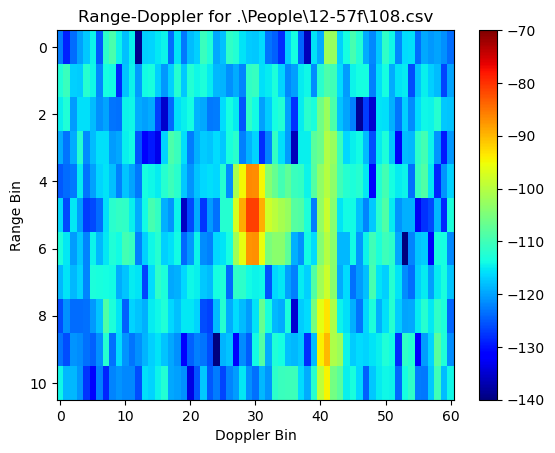

In [3]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[16300], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[16300]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()

# Example Drone Sample

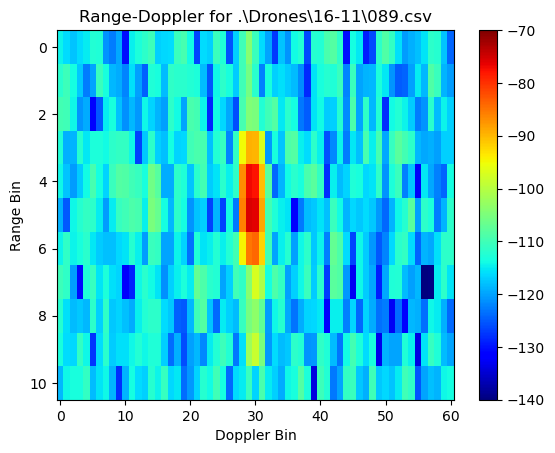

In [4]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[10300], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[10300]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()

# Example Car Sample

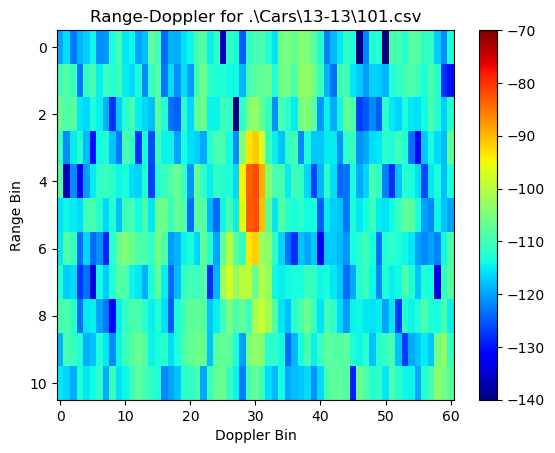

In [5]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[100], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[100]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()

# Data Preprocessing

In [6]:
# Preprocessing the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train_original, x_test_original, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=62, shuffle=True)

x_train_original_shape = x_train_original.shape

# Reshape the data to 2D
x_train_reshaped = x_train_original.reshape(x_train_original.shape[0], -1)

# Create and fit the StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)

# Reshape the data back to its original shape
x_train = x_train_scaled.reshape(x_train_original_shape)

# X_test scaling 
x_test_original_shape = x_test_original.shape

# Reshape the data to 2D
x_test_reshaped = x_test_original.reshape(x_test_original.shape[0], -1)

# Create and fit the StandardScaler
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_reshaped)

# Reshape the data back to its original shape
x_test = x_test_scaled.reshape(x_test_original_shape)


# Defining the Utility Functions to Plot Accuracies and Losses

In [7]:
#Defining utility functions to plot Accuracies and Losses

def smooth_curve(points,factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

def plot_convergence():
  plt.figure(figsize=(10, 5))
  plt.subplot(1,2,1)
  plt.plot(smooth_curve(history.history['accuracy']), marker= 'o', label = 'Train Accuracy')
  plt.plot(smooth_curve(history.history['val_accuracy']), marker= 'o', label = 'Validation Accuracy')
  plt.title('Training and Validation Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(smooth_curve(history.history['loss']),marker = 'o', label = 'Train Loss')
  plt.plot(smooth_curve(history.history['val_loss']),marker = 'o', label = 'Validation Loss')
  plt.title('Training and Validation Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()

def test_model_accuracy(model):
  test_loss,test_accuracy = model.evaluate(x_test, y_test)
  print(f"Test Accuracy: {test_accuracy * 100:.4f}%")
  plot_convergence()

# Reshaping

In [8]:
from tensorflow.keras.utils import to_categorical
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

x_train=np.reshape(x_train,[-1,11,61,1])
x_test=np.reshape(x_test,[-1,11,61,1])

y_train = (to_categorical(y_train, 3))
y_test = (to_categorical(y_test, 3))

# Convolutional Model Building
### Convolutional Layer (32)
### Average Pooling Layer (2,2)
### Dropout Layer (0.25)
### Convolutional Layer (64)
### Average Pooling Layer (2,2)
### Dropout Layer (0.25)
### Dense Layer (64)
### Dropout Layer (0.25)
### Dense Layer (64)
### Dropout Layer (0.25)
### Dense Layer (64)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, Activation, AveragePooling2D

model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3,3), padding='same', input_shape=(11,61,1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Second Convolutional Layer
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Flattening the output to feed the dense layer
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    
    # Output Layer with softmax activation for multi-class classification
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 61, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 11, 61, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 11, 61, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 61, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 61, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 11, 61, 32)        0

In [10]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2,batch_size=64)

Epoch 1/30
175/175 [==============================] - 10s 51ms/step - loss: 0.4658 - accuracy: 0.8082 - val_loss: 0.4698 - val_accuracy: 0.8174
Epoch 2/30
175/175 [==============================] - 9s 49ms/step - loss: 0.2498 - accuracy: 0.9108 - val_loss: 0.2405 - val_accuracy: 0.9221
Epoch 3/30
175/175 [==============================] - 10s 57ms/step - loss: 0.2013 - accuracy: 0.9305 - val_loss: 0.1786 - val_accuracy: 0.9371
Epoch 4/30
175/175 [==============================] - 8s 44ms/step - loss: 0.1787 - accuracy: 0.9348 - val_loss: 0.2353 - val_accuracy: 0.9210
Epoch 5/30
175/175 [==============================] - 8s 48ms/step - loss: 0.1524 - accuracy: 0.9477 - val_loss: 0.1308 - val_accuracy: 0.9521
Epoch 6/30
175/175 [==============================] - 8s 47ms/step - loss: 0.1405 - accuracy: 0.9500 - val_loss: 0.1256 - val_accuracy: 0.9518
Epoch 7/30
175/175 [==============================] - 9s 50ms/step - loss: 0.1422 - accuracy: 0.9492 - val_loss: 0.1379 - val_accuracy: 0.94

110/110 [==============================] - 1s 7ms/step - loss: 0.1570 - accuracy: 0.9588
Test Accuracy: 95.8822%


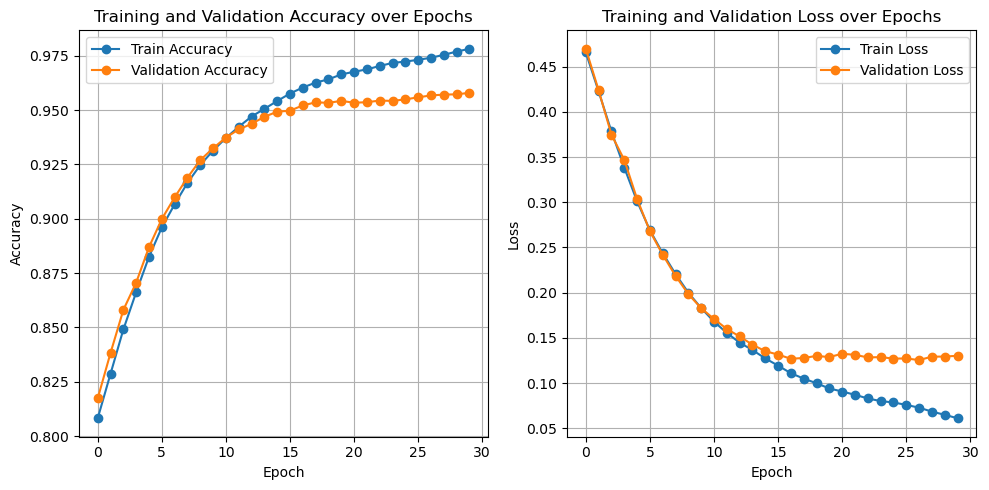

In [11]:
test_model_accuracy(model)

In [12]:
from tensorflow.keras.models import load_model

model.save('cnn_model')

INFO:tensorflow:Assets written to: cnn_model\assets


INFO:tensorflow:Assets written to: cnn_model\assets


In [13]:
model2 = load_model('cnn_model')

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(x_test)

# Convert y_test from one-hot encoded to label encoded
y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Now you can generate the classification report
print(classification_report(y_test_labels, y_pred))

110/110 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1160
           1       0.90      0.97      0.93      1001
           2       1.00      0.99      0.99      1336

    accuracy                           0.96      3497
   macro avg       0.96      0.96      0.96      3497
weighted avg       0.96      0.96      0.96      3497



In [15]:
labels = ['car', 'drone', 'people']

evaluation = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

110/110 [==============================] - 1s 9ms/step - loss: 0.1570 - accuracy: 0.9588
Test Accuracy : 95.88%


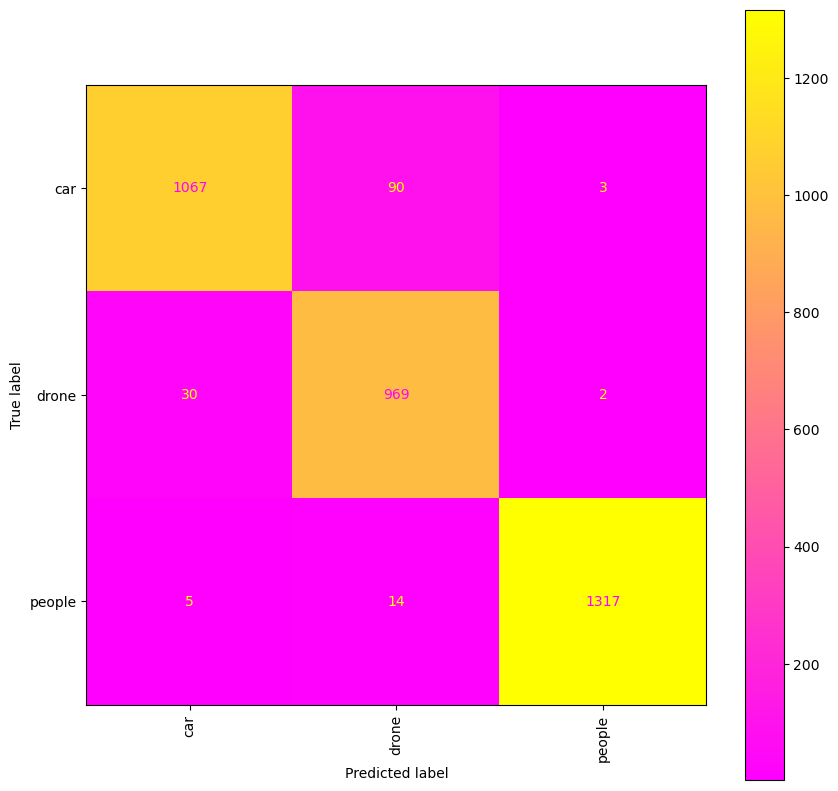

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='spring')

plt.show()